In [63]:
import log_init
import logging
import mnist_diy
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import sklearn.multiclass  as multiclass

log_init.log_init()
logging.debug("hello world")
print("sklearn version=",sklearn.__version__)

sklearn version= 0.20.2


In [64]:
traindata =list(mnist_diy.read(dataset="training",path="."))
testdata =list(mnist_diy.read(dataset="testing",path="."))

In [65]:
y_train =[x[0] for x in traindata]
X_train =[x[1] for x in traindata]
y_test =[x[0] for x in testdata]
X_test =[x[1] for x in testdata]

X_train =pd.DataFrame(np.array(X_train).reshape(len(X_train),28*28))
y_train =pd.DataFrame(np.array(y_train).reshape(len(y_train),1))
X_test =pd.DataFrame(np.array(X_test).reshape(len(X_test),28*28))
y_test =pd.DataFrame(np.array(y_test).reshape(len(y_test),1))
y_train_5 = (y_train ==5)
y_test_5 = (y_test == 5)

# print("type=",typey_train)
# plt.imshow(X_train[25],cmap=mpl.cm.binary)
# plt.show()


In [66]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)
predict_ret =sgd_clf.predict(X_test[:100])
# print("predict_ret=",predict_ret)
# print("real_ret=",y_test_5[:100])

C:\softwareInstall\anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\softwareInstall\anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [67]:
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.base import BaseEstimator

class dumbClassifier(BaseEstimator):
    def fit(self,X,y=None):
        pass
    def predict(self,X):
        return np.zeros((len(X),1),dtype=bool)

sgd_clf2 = SGDClassifier(random_state=42)
dumb_clf = dumbClassifier()
cross_val_score(dumb_clf,X_train,y_train_5,cv=3,scoring="accuracy")


array([0.91125, 0.90855, 0.90915])

In [68]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score
y_train_pred = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)
confusion_matrix_ret = confusion_matrix(y_train_5,y_train_pred)
precision_score_ret = precision_score(y_train_5,y_train_pred)
recall_score_ret = recall_score(y_train_5,y_train_pred)
print("len(y_train_pred)=",len(y_train_pred),"\nconfusion_matrix=\n",confusion_matrix_ret)
print("precision_ret=",precision_score_ret," recall_ret=",recall_score_ret)

C:\softwareInstall\anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\softwareInstall\anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\softwareInstall\anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000,

len(y_train_pred)= 60000 
confusion_matrix=
 [[52992  1587]
 [ 1074  4347]]
precision_ret= 0.7325581395348837  recall_ret= 0.8018815716657444


precision_len= 9747  recalls_len= 9747  thresholds_len 9746


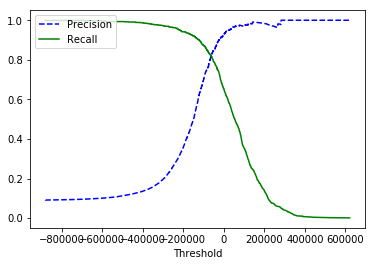

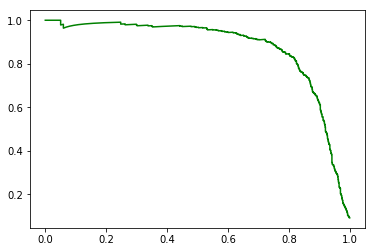

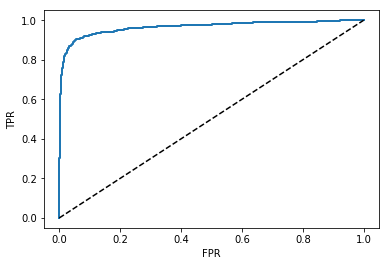

In [69]:
import operator
def plot_precision_recall_vs_threshold(precisions,recalls,thresholds):
    plt.plot(thresholds,precisions[:-1],"b--",label="Precision")
    plt.plot(thresholds,recalls[:-1],"g-",label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
#     plt.ylim([0,1])
    



nothreshold_predict =sgd_clf.predict(X_test)
score_predict =sgd_clf.decision_function(X_test)
precision,recalls,thresholds = sklearn.metrics.precision_recall_curve(y_test_5,score_predict)
fpr,tpr,roc_thresholds = sklearn.metrics.roc_curve(y_test_5,score_predict)
roc_aux_score =sklearn.metrics.roc_auc_score(y_test_5,score_predict)


print("precision_len=",len(precision)," recalls_len=",len(recalls)," thresholds_len",len(thresholds))
plot_precision_recall_vs_threshold(precision,recalls,thresholds)
plt.show()
plt.plot(recalls,precision,"g-",label="recallVSprecision")
plt.show()

plt.plot(fpr,tpr,linewidth=2)
plt.plot([0,1],[0,1],"k--")
plt.xlabel("FPR")
plt.ylabel("TPR")
# plt.annotate("aux="+str(roc_aux_score))
plt.show()



# threshold= 300000
# threshold_predict=(score_predict>threshold)
# print("nothreshold=",nothreshold_predict)
# print("score_predict=",score_predict)
# print("threshold=",threshold_predict)
# print("cmpret=",operator.eq(nothreshold_predict,threshold_predict))


In [70]:
sgd_clf_mul_oneVsAll = SGDClassifier(random_state=42)
sgd_clf_mul_oneVsAll.fit(X_train,y_train)
predict_ret = sgd_clf_mul_oneVsAll.predict(X_test[:10])
print("predict_ret=",predict_ret)
print("y_test=",y_test[:10])
noscale_cross_score= cross_val_score(sgd_clf_mul_oneVsAll,X_train,y_train,cv=3,scoring="accuracy")
print("noscale_cross_score=",noscale_cross_score)

scaler = sklearn.preprocessing.StandardScaler()
X_train_scaled =scaler.fit_transform(X_train.astype(np.float64))
scale_cross_score = cross_val_score(sgd_clf_mul_oneVsAll,X_train_scaled,y_train,cv=3,scoring="accuracy")
print("scale_cross_score=",scale_cross_score)

# sgd_clf_mul_oneVsone =SGDClassifier(random_state=42)
# sgd_clf_mul_oneVsone= sklearn.multiclass.OneVsOneClassifier(sgd_clf_mul_oneVsone)
# sgd_clf_mul_oneVsone.fit(X_train,y_train)
# predict_ret = sgd_clf_mul_oneVsone.predict(X_test[:10])
# print("predict_ret=",predict_ret)
# print("y_test=",y_test[:10])



C:\softwareInstall\anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\softwareInstall\anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


predict_ret= [7 2 1 0 4 1 4 9 6 9]
y_test=    0
0  7
1  2
2  1
3  0
4  4
5  1
6  4
7  9
8  5
9  9


C:\softwareInstall\anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\softwareInstall\anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\softwareInstall\anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000,

noscale_cross_score= [0.86872625 0.87639382 0.87848177]


C:\softwareInstall\anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\softwareInstall\anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\softwareInstall\anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000,

scale_cross_score= [0.90736853 0.90884544 0.91363705]


In [71]:
y_train_pred =cross_val_predict(sgd_clf,X_train_scaled,y_train,cv=3)
conf_mx = confusion_matrix(y_train,y_train_pred)


C:\softwareInstall\anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\softwareInstall\anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\softwareInstall\anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000,

type(conf_mx)= <class 'numpy.ndarray'> [[5726    2   26   12   11   47   47    9   39    4]
 [   1 6479   42   33    8   39    8    9  113   10]
 [  55   35 5319  104   79   20  106   51  174   15]
 [  45   40  145 5372    3  210   33   50  135   98]
 [  17   26   38    8 5361    5   57   31   86  213]
 [  74   38   43  199   71 4584  116   26  175   95]
 [  33   22   43    2   42   90 5640    3   43    0]
 [  24   23   73   29   60   12    4 5774   18  248]
 [  49  165   73  150   16  153   50   24 5038  133]
 [  39   31   26   92  163   35    3  177   79 5304]]


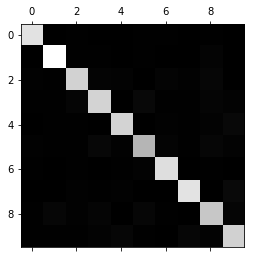

row_sums= [[5923]
 [6742]
 [5958]
 [6131]
 [5842]
 [5421]
 [5918]
 [6265]
 [5851]
 [5949]]
norm_conf_xml= [[9.66739828e-01 3.37666723e-04 4.38966740e-03 2.02600034e-03
  1.85716698e-03 7.93516799e-03 7.93516799e-03 1.51950025e-03
  6.58450110e-03 6.75333446e-04]
 [1.48323939e-04 9.60990804e-01 6.22960546e-03 4.89469000e-03
  1.18659152e-03 5.78463364e-03 1.18659152e-03 1.33491546e-03
  1.67606052e-02 1.48323939e-03]
 [9.23128567e-03 5.87445451e-03 8.92749245e-01 1.74555220e-02
  1.32594830e-02 3.35683115e-03 1.77912051e-02 8.55991944e-03
  2.92044310e-02 2.51762336e-03]
 [7.33974882e-03 6.52422117e-03 2.36503017e-02 8.76202903e-01
  4.89316588e-04 3.42521611e-02 5.38248247e-03 8.15527646e-03
  2.20192465e-02 1.59843419e-02]
 [2.90996234e-03 4.45053064e-03 6.50462170e-03 1.36939404e-03
  9.17665183e-01 8.55871277e-04 9.75693256e-03 5.30640192e-03
  1.47209860e-02 3.64601164e-02]
 [1.36506180e-02 7.00977679e-03 7.93211585e-03 3.67090943e-02
  1.30972145e-02 8.45600443e-01 2.13982660e-02 

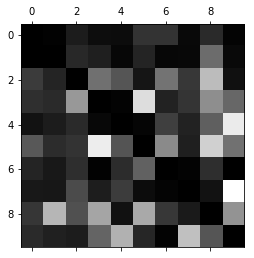

In [75]:
print("type(conf_mx)=",type(conf_mx),conf_mx)
plt.matshow(conf_mx,cmap=plt.cm.gray)
plt.show()
row_sums = conf_mx.sum(axis=1,keepdims=True)
norm_conf_mx = conf_mx/row_sums
print("row_sums=",row_sums)
print("norm_conf_xml=",norm_conf_mx)
np.fill_diagonal(norm_conf_mx,0)
plt.matshow(norm_conf_mx,cmap=plt.cm.gray)
plt.show()
